### Data analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
DATA_PATH = 'pakiet/train_data.csv'
df = pd.read_csv(DATA_PATH)
print(df.columns)
df.head()

Index(['SalePrice', 'YearBuilt', 'Size(sqf)', 'Floor', 'HallwayType',
       'HeatingType', 'AptManageType', 'N_Parkinglot(Ground)',
       'N_Parkinglot(Basement)', 'TimeToBusStop', 'TimeToSubway', 'N_manager',
       'N_elevators', 'SubwayStation', 'N_FacilitiesInApt',
       'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)'],
      dtype='object')


,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0


In [45]:
null_count = df.isnull().sum().sum()
null_count

0

In [46]:
def transform_func(x):
    if x < 100000:
        return "cheap"
    if x < 350000:
        return "average"
    return "expensive"

df['SalePrice'] = df['SalePrice'].map(transform_func)
df.head()

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,average,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,cheap,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,cheap,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,expensive,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,cheap,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0


Ewentualnie - najpierw regresja, potem zmapować na odpowiednią klasę.

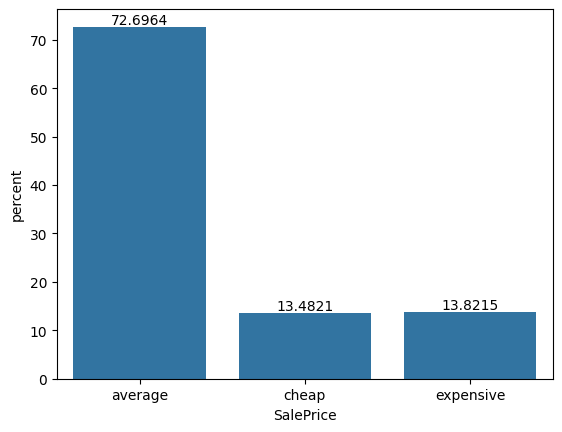

In [20]:
%matplotlib inline
ax = sns.countplot(data=df, x='SalePrice', stat="percent")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

Klasy są niezbalansowane

   YearBuilt  Size(sqf)  Floor  N_Parkinglot(Ground)  N_Parkinglot(Basement)  \
0       2006        814      3                 111.0                   184.0   
1       1985        587      8                  80.0                    76.0   
2       1985        587      6                  80.0                    76.0   
3       2006       2056      8                 249.0                   536.0   
4       1992        644      2                 142.0                    79.0   

   N_manager  N_elevators  N_FacilitiesInApt  N_FacilitiesNearBy(Total)  \
0        3.0          0.0                  5                        6.0   
1        2.0          2.0                  3                       12.0   
2        2.0          2.0                  3                       12.0   
3        5.0         11.0                  5                        3.0   
4        4.0          8.0                  3                        9.0   

   N_SchoolNearBy(Total)  ...  TimeToSubway_15min~20min  \
0        

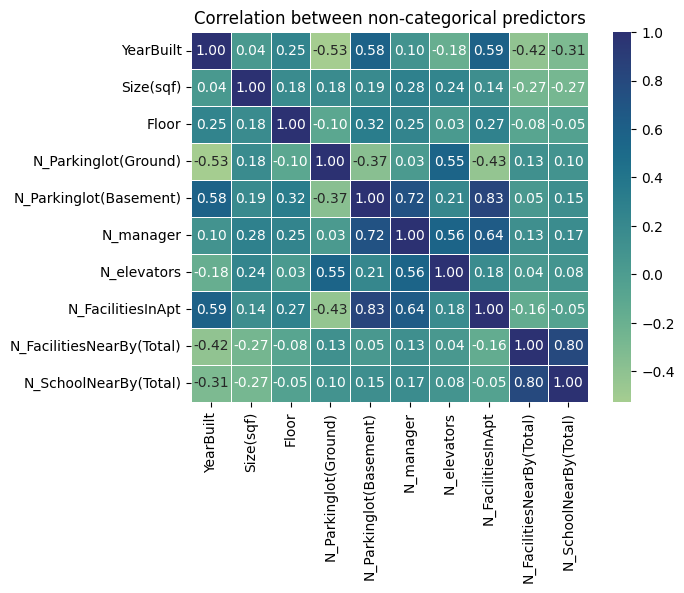

In [39]:
# get dummies of categorical variables
categorical = ["HallwayType", "SalePrice", "HeatingType", "AptManageType", "TimeToBusStop", "TimeToSubway", "SubwayStation"]
dummies = pd.get_dummies(data=df, columns=categorical, drop_first=True, dtype=float)
df_dummies = pd.concat([df, dummies], axis=1)
df_dummies.drop(labels=categorical, axis=1, inplace=True)
print(dummies.head())
df_no_cat = df.drop(columns=categorical)
corr_matrix = df_no_cat.corr()
heatmap = sns.heatmap(corr_matrix, cmap="crest", annot=True, fmt=".2f", linewidth=.5)
heatmap.set(title="Correlation between non-categorical predictors")
plt.show()